# 天擎大数据云平台

天擎大数据云平台 CMADaaS 使用 MUSIC 接口用于检索数据，提供包括 Python 在内的多种编程语言 SDK，详情请访问天擎门户网站 [开发SDK](http://idata.cma/cmadaas/home/jumpPage.action?pageName=serviceandsupport&toPage=devsdk) 栏目。

因天擎 MUSIC SDK 仅内网使用，本文介绍仿照 MUSIC SDK 重新实现的 MUSIC Python 接口库 nuwe-cmadaas-python。

## 安装

nuwe-cmadaas-python 库尚未发布到 PYPI 中，请从 GitHub 项目库中下载最新代码并使用 pip 安装。
仓库地址: https://github.com/perillaroc/nuwe-cmadaas-python

```bash
git clone https://github.com/perillaroc/nuwe-cmadaas-python.git
cd nuwe-cmadaas-python
pip install .
```

### 配置

天擎平台检索数据需要准备账户，并申请资料的访问权限。

创建配置文件 `~/.config/cedarkit.yaml`，配置访问天擎的服务器信息、账户名和密码，类似：

```yaml
cmadaas:
  auth:
    user: user name
    password: user password
  server:
    music_server: music server ip
    music_port: music server port
    music_connTimeout: 3  # connection time out, seconds
    music_readTimeout: 3000  # read time out, seconds
    music_ServiceId: music service id
```

详细配置参数信息请查看天擎 MUSIC SDK 示例文件。

## 准备

导入需要的包

In [2]:
import xarray as xr
import pandas as pd
from nuwe_cmadaas.model import retrieve_model_grid

设置绘图的数据参数，使用 CMA-MESO 2024 年 11 月 14 日 00 时次 024 时效数据。

天擎数据条目使用“中国气象局区域模式CMA-MESO原始分辨率预报产品（0.03×0.03）”，数据编码“NAFP_GRAPES_MESO_FOR_3KM”。

In [3]:
system_name = "CMA-MESO"
start_time = pd.to_datetime("2024-11-14 00:00:00")
forecast_time = pd.to_timedelta("24h")

CMADAAS_DATA_ID = "NAFP_GRAPES_MESO_FOR_3KM"

## 加载数据

加载 2 米温度场

参数解释：

- `paramter="TEM"`：气温
- `level_type=103`：特定高度层（地面以上），单位米
- `level=2`：2 米

更详细的数据说明请访问天擎门户网站的[数据条目](http://idata.cma/cmadaas/portalData/toDataPage.action?dataTypeCode=F&categoryCode=1&dataClassId=F.0009.0006.M002)。

In [4]:
t_2m_field = retrieve_model_grid(
    CMADAAS_DATA_ID,
    start_time=start_time,
    forecast_time=forecast_time,
    parameter="TEM",
    level_type=103,
    level=2,
) - 273.15
t_2m_field

<xarray.DataArray '' (latitude: 1671, longitude: 2501)> Size: 33MB
array([[ 27.04400024,  27.05800781,  27.05098877, ...,  27.54900513,
         27.57198486,  27.66100464],
       [ 27.0960022 ,  27.05098877,  27.06798706, ...,  27.57601318,
         27.57198486,  27.66100464],
       [ 27.06200562,  27.07299194,  27.06798706, ...,  27.54299316,
         27.55001221,  27.65899048],
       ...,
       [ -6.43500366,  -6.69699707,  -5.9329895 , ..., -21.05498352,
        -21.48097839, -20.02599182],
       [ -6.62601318,  -6.78101196,  -6.38400879, ..., -21.55898132,
        -21.51698914, -20.27397766],
       [-19.79797974, -19.87097778, -19.94298401, ..., -20.50598755,
        -19.98699036, -19.9599823 ]])
Coordinates:
  * latitude   (latitude) float64 13kB 10.0 10.03 10.06 ... 60.04 60.07 60.1
  * longitude  (longitude) float64 20kB 70.0 70.03 70.06 ... 144.9 145.0 145.0

## 绘图

使用 cedarkit-maps 绘制 2 米温度填充图

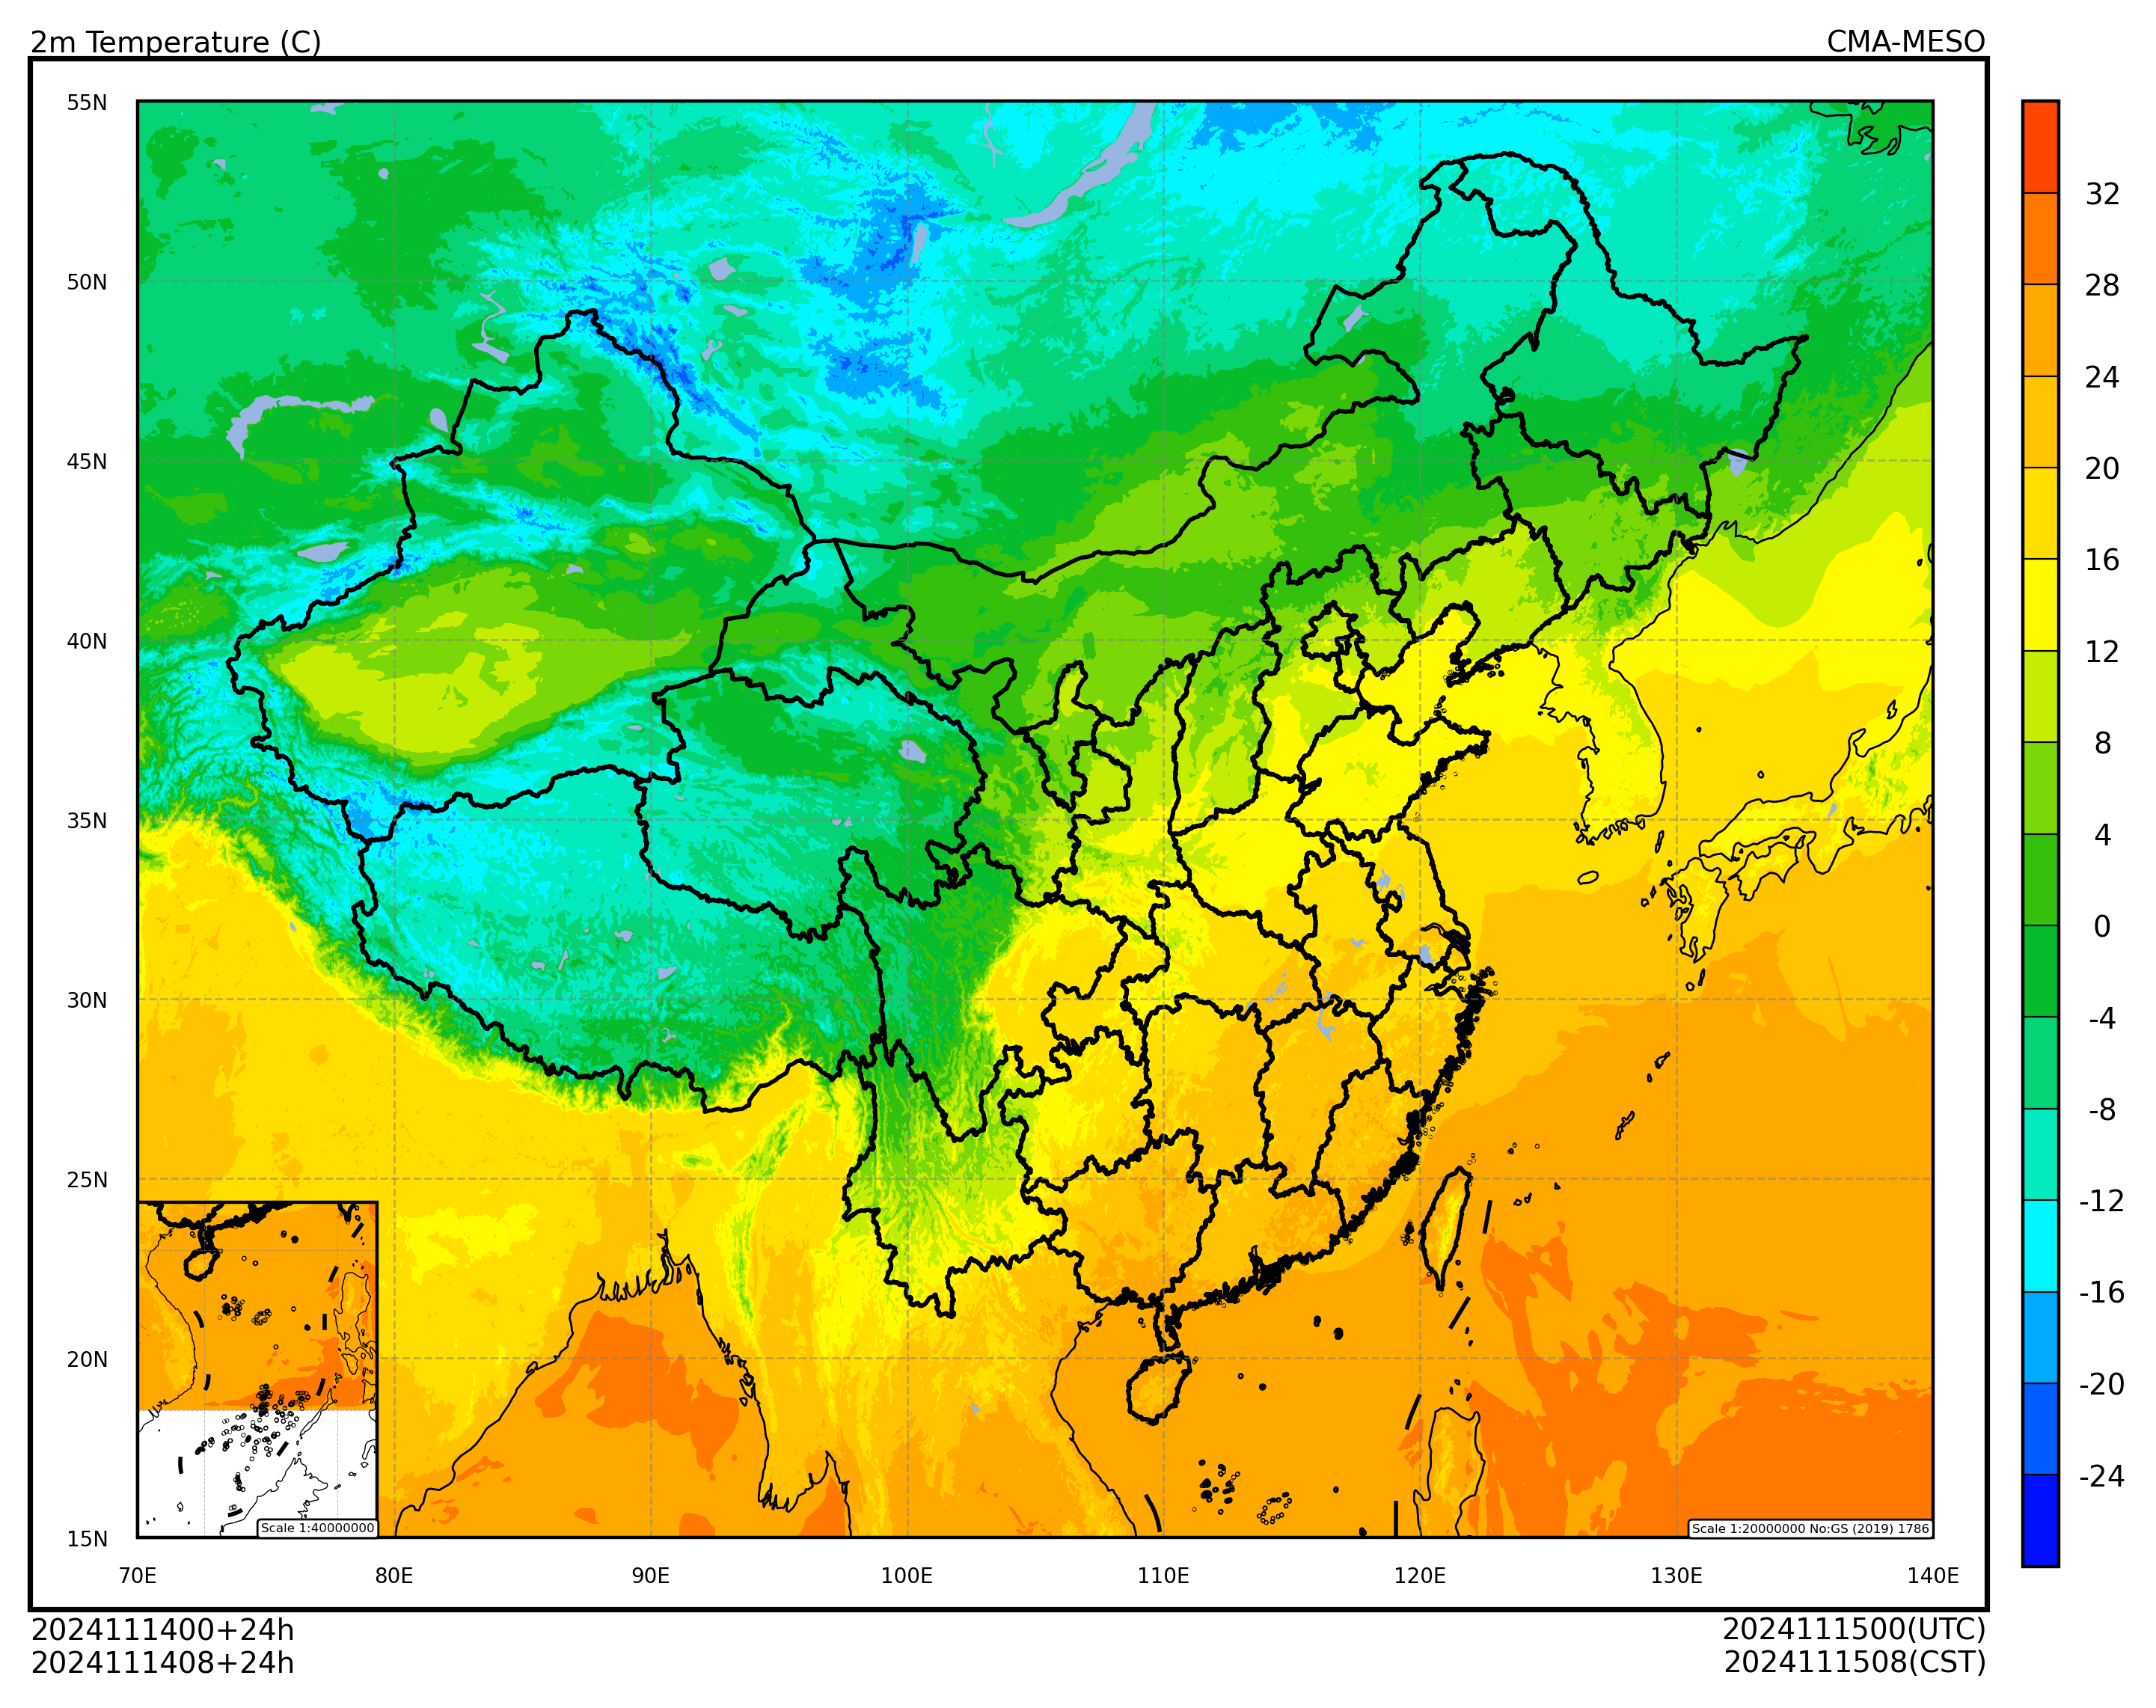

In [5]:
from cedarkit.maps.style import ContourStyle
from cedarkit.maps.chart import Panel
from cedarkit.maps.domains import EastAsiaMapTemplate
from cedarkit.maps.colormap import get_ncl_colormap

t_2m_level = [-24, -20, -16, -12, -8, -4, 0, 4, 8, 12, 16, 20, 24, 28, 32]
color_index = [2, 12, 22, 32, 42, 52, 62, 72, 82, 92, 102, 112, 122, 132, 142, 152]
t_2m_color_map = get_ncl_colormap("BlAqGrYeOrReVi200", index=color_index)
t_2m_style = ContourStyle(
    colors=t_2m_color_map,
    levels=t_2m_level,
    fill=True,
)
domain = EastAsiaMapTemplate()
panel = Panel(domain=domain)
panel.plot(t_2m_field, style=t_2m_style)
domain.set_title(
    panel=panel,
    graph_name="2m Temperature (C)",
    system_name=system_name,
    start_time=start_time,
    forecast_time=forecast_time,
)
domain.add_colorbar(panel=panel, style=t_2m_style)
panel.show()